# Linear Regression
We compute the regression line linking counts of letters in a text to counts of letter _a_ using Python functions (no numpy).

Author: Pierre Nugues

## Modules
We import the modules we need to run the program

In [1]:
import random
import vector  # vector operations using Python
import matplotlib.pyplot as plt

## The Dataset

We load the data and we possibly normalize it

The English dataset

In [2]:
X = [[1, 35680.0],
     [1, 42514.0],
     [1, 15162.0],
     [1, 35298.0],
     [1, 29800.0],
     [1, 40255.0],
     [1, 74532.0],
     [1, 37464.0],
     [1, 31030.0],
     [1, 24843.0],
     [1, 36172.0],
     [1, 39552.0],
     [1, 72545.0],
     [1, 75352.0],
     [1, 18031.0]]

In [3]:
y = [2217.0,
     2761.0,
     990.0,
     2274.0,
     1865.0,
     2606.0,
     4805.0,
     2396.0,
     1993.0,
     1627.0,
     2375.0,
     2560.0,
     4597.0,
     4871.0,
     1119.0]

### Function to normalize the data

In [4]:
def normalize(observations):
    maxima = [max([obs[i] for obs in observations])
              for i in range(len(observations[0]))]
    return ([[obs[i] / maxima[i]
              for i in range(len(observations[0]))] for obs in observations],
            maxima)

In [5]:
normalized = True
debug = False

alpha = 1.0e-10
if normalized:
    X, maxima_X = normalize(X)
    maxima_y = max(y)
    y = [yi / maxima_y for yi in y]
    maxima = maxima_X + [maxima_y]
    alpha = 1.0
    print("-Normalized-")

-Normalized-


In [6]:
X, y

([[1.0, 0.4735109884276463],
  [1.0, 0.5642053296528294],
  [1.0, 0.20121562798598577],
  [1.0, 0.4684414481367449],
  [1.0, 0.39547722688183456],
  [1.0, 0.5342260324875252],
  [1.0, 0.9891177407368086],
  [1.0, 0.49718653784902855],
  [1.0, 0.41180061577662175],
  [1.0, 0.32969264253105424],
  [1.0, 0.4800403439855611],
  [1.0, 0.5248964858265208],
  [1.0, 0.9627481685953923],
  [1.0, 1.0],
  [1.0, 0.2392902643592738]],
 [0.45514268117429685,
  0.5668240607678094,
  0.2032436871278998,
  0.46684459043317594,
  0.38287825908437695,
  0.535003079449805,
  0.98645042085814,
  0.49189078218025045,
  0.4091562307534387,
  0.33401765551221513,
  0.487579552453295,
  0.5255594333812359,
  0.9437487168959146,
  1.0,
  0.22972695545062616])

## Function to compute the sum of squared errors

In [7]:
def sse(X, y, w):
    error = vector.sub(y, vector.mul_mat_vec(X, w))
    return vector.dot(error, error)

## Function to predict values

In [8]:
def predict(X, w):
    return vector.mul_mat_vec(X, w)

## Stochastic descent
Function to fit the data with a stochastic descent

In [9]:
def fit_stoch(X, y, alpha, w,
              epochs=500,
              epsilon=1.0e-5):
    """
    Stochastic gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs, logs_stoch
    logs = []
    logs_stoch = []
    random.seed(0)
    idx = list(range(len(X)))
    for epoch in range(epochs):
        random.shuffle(idx)
        for i in idx:
            y_hat = predict([X[i]], w)[0]
            loss = y[i] - y_hat
            gradient = vector.mul(loss, X[i])
            w = vector.add(w, vector.mul(alpha, gradient))
            logs_stoch += (w, alpha, sse(X, y, w))
        if vector.norm(gradient) < epsilon:
            print('Gradient', vector.norm(gradient))
            break
        logs += (w, alpha, sse(X, y, w))
    print("Epoch", epoch)
    return w

## Batch descent
Function to fit the data with a batch descent

In [10]:
def fit_batch(X, y, alpha, w,
              epochs=500,
              epsilon=1.0e-5):
    """
    Batch gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs
    logs = []
    alpha /= len(X)
    for epoch in range(epochs):
        y_hat = predict(X, w)
        loss = vector.sub(y, y_hat)
        gradient = vector.mul_mat_vec(vector.transpose(X), loss)
        w = vector.add(w, vector.mul(alpha, gradient))
        logs += (w, alpha, sse(X, y, w))
        if vector.norm(gradient) < epsilon:
            break
    print("Epoch", epoch)
    return w

## We apply a batch descent

In [11]:
print("===Batch descent===")
w = [0.0] * (len(X[0]))
w = fit_batch(X, y, alpha, w)
print("Weights", w)
print("SSE", sse(X, y, w))
if normalized:
    w = [w[i] * maxima[-1] / maxima[i] for i in range(len(w))]
    print("Restored weights", w)
if debug:
    print("Logs", logs)

===Batch descent===
Epoch 235
Weights [-0.0007317447237635006, 0.9946973063066157]
SSE 0.0008629437264529638
Restored weights [-3.5643285494520116, 0.06430049075033874]


## We restore the coordinates

In [12]:
x_fig = [X[i][1] * maxima_X[1] for i in range(len(X))]
y_fig = [yi * maxima_y for yi in y]

## We plot the coordinates and the line

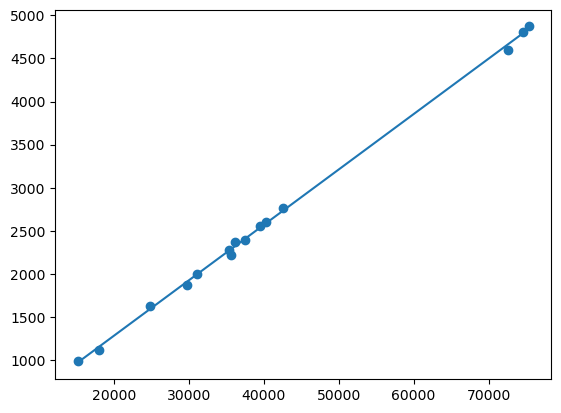

In [13]:
plt.scatter(x_fig, y_fig)
plt.plot([min(x_fig), max(x_fig)],
         [vector.dot([1, min(x_fig)], w),
          vector.dot([1, max(x_fig)], w)])
plt.show()

## Showing the iterations

### The errors

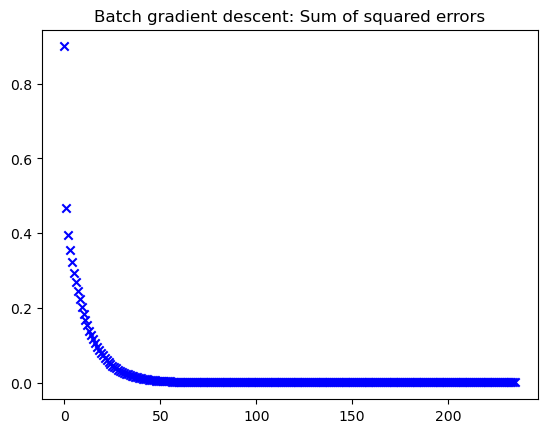

In [14]:
plt.scatter(range(len(logs[2::3])), logs[2::3], c='b', marker='x')
plt.title("Batch gradient descent: Sum of squared errors")
plt.show()

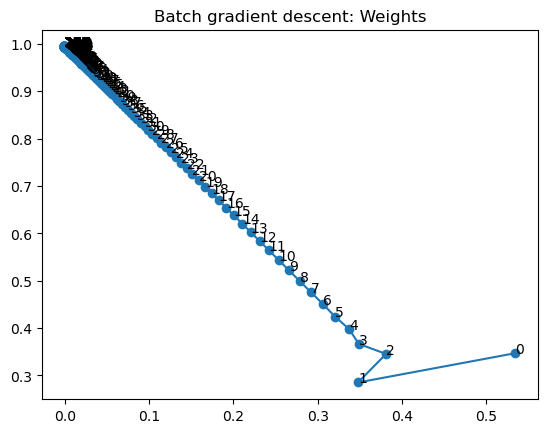

In [15]:
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(
    map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title("Batch gradient descent: Weights")
plt.show()

## We apply a stochastic descent

In [16]:
print("===Stochastic descent===")
w = [0.0] * (len(X[0]))
w = fit_stoch(X, y, alpha, w)
print("Weights", w)
print("SSE", sse(X, y, w))
if normalized:
    w = [w[i] * maxima[-1] / maxima[i] for i in range(len(w))]
    print("Restored weights", w)
if debug:
    print("Logs", logs)
    print("Logs stoch.", logs_stoch)

===Stochastic descent===
Epoch 499
Weights [0.003390672761850816, 0.9937307160856609]
SSE 0.0010584790929933962
Restored weights [16.515967022975325, 0.0642380071936147]


## We plot the line

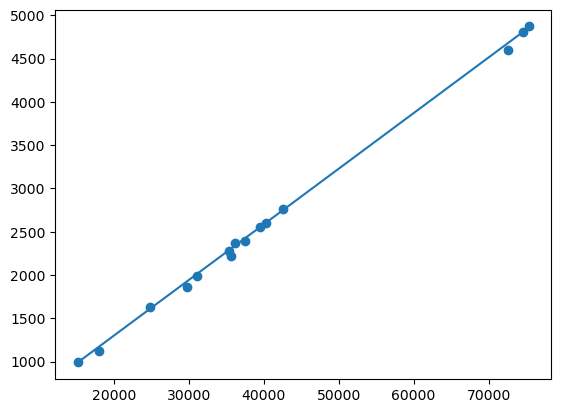

In [17]:
plt.scatter(x_fig, y_fig)
plt.plot([min(x_fig), max(x_fig)],
         [vector.dot([1, min(x_fig)], w),
          vector.dot([1, max(x_fig)], w)])
plt.show()

## Showing the iterations

### The errors by epoch

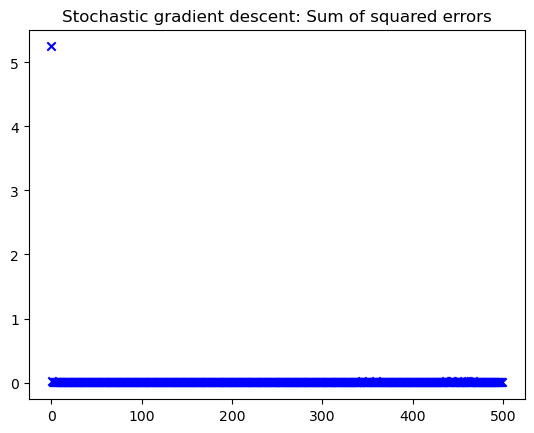

In [18]:
plt.scatter(range(len(logs[2::3])), logs[2::3], c='b', marker='x')
plt.title("Stochastic gradient descent: Sum of squared errors")
plt.show()

### The weight updates by epoch

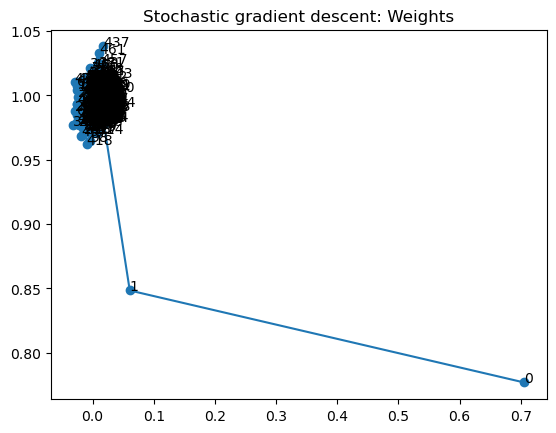

In [19]:
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(
    map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title("Stochastic gradient descent: Weights")
plt.show()

### The weight updates

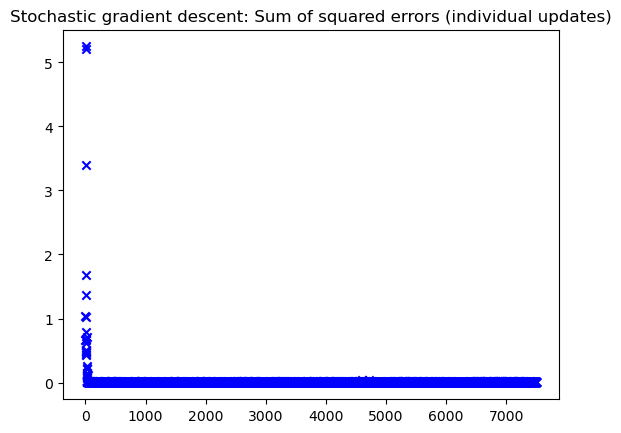

In [20]:
plt.scatter(range(len(logs_stoch[2::3])), logs_stoch[2::3], c='b', marker='x')
plt.title("Stochastic gradient descent: Sum of squared errors (individual updates)")
plt.show()

### The weight updates by individual update

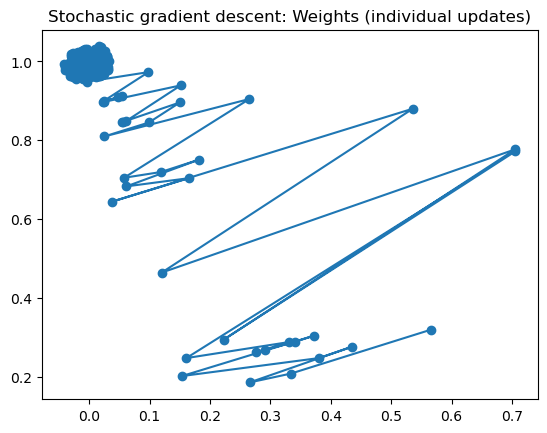

In [21]:
plt.plot(list(map(lambda pair: pair[0], logs_stoch[0::3])), list(map(lambda pair: pair[1], logs_stoch[0::3])),
         marker='o')
plt.title("Stochastic gradient descent: Weights (individual updates)")
plt.show()